# <span style="color:red"> <strong> MovieLens 20M Dataset </strong>

## About Dataset
### Context
The dataset describes ratings and free-text tagging activities from MovieLens, a movie recommendation service. It contains 20000263 ratings and 465564 tags applications across 27278 movies. These data were created by 138493 users between January 09, 1995 and March 31, 2015. This dataset was generated on October 17, 2016.

### Content
No demographic information is included. Each user is represented by an id, and no other information is provided. The data are contained in six files.

`tag.csv` that contains tags applied to movies by users:
- userId
- movieId
- tag
- timestamp


`ratings.csv` that contains ratings of movies by users:
- userId
- movieId
- rating
- timestamp

`movieId` that contains movie information:
- movieId
- title
- genres

`link.csv` that contains identifiers that can be used to link to other sources:
- movieId
- imdbId
- tmbdId

`genome_scores.csv` that contains movie-tag relevance data:
- movieId
- tagId
- relevance

`genome_tags.csv` that contains tag descriptions:
- tagId
- tag

### Acknowledgements:

F. Maxwell Harper and Joseph A. Konstan. 2015. The MovieLens Datasets: History and Context. ACM Transactions on Interactive Intelligent Systems (TiiS) 5, 4, Article 19 (December 2015), 19 pages. DOI=http://dx.doi.org/10.1145/2827872.



## Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

%matplotlib inline

In [2]:
#load datasets
rating_df        = pd.read_csv("data/rating.csv")
movie_df         = pd.read_csv("data/movie.csv")
tag_df           = pd.read_csv("data/tag.csv")
genome_scores_df = pd.read_csv("data/genome_scores.csv")
genome_tags_df   = pd.read_csv("data/genome_tags.csv")
link_df          = pd.read_csv("data/link.csv")

### QA Section

- What are the most common genres?
- Movies with highest ratings?
- Genres with highest ratings?
- Top 3 movies each year?
- Most frequent tags?

In [3]:
#QA1: what are the most common genres?
genres = movie_df["genres"].value_counts().to_frame().reset_index()
genres = genres.rename(columns={"index": "genre", "genres": "count"})
genres = genres.sort_values(by="count", ascending=False)
genres

,genre,count
0,Drama,4520
1,Comedy,2294
2,Documentary,1942
3,Comedy|Drama,1264
4,Drama|Romance,1075
...,...,...
936,Comedy|Drama|Musical|IMAX,1
937,Adventure|Animation|Horror|Sci-Fi|Thriller,1
938,Action|Adventure|Horror|Sci-Fi|Thriller|War,1
939,Action|Drama|Mystery|Sci-Fi,1


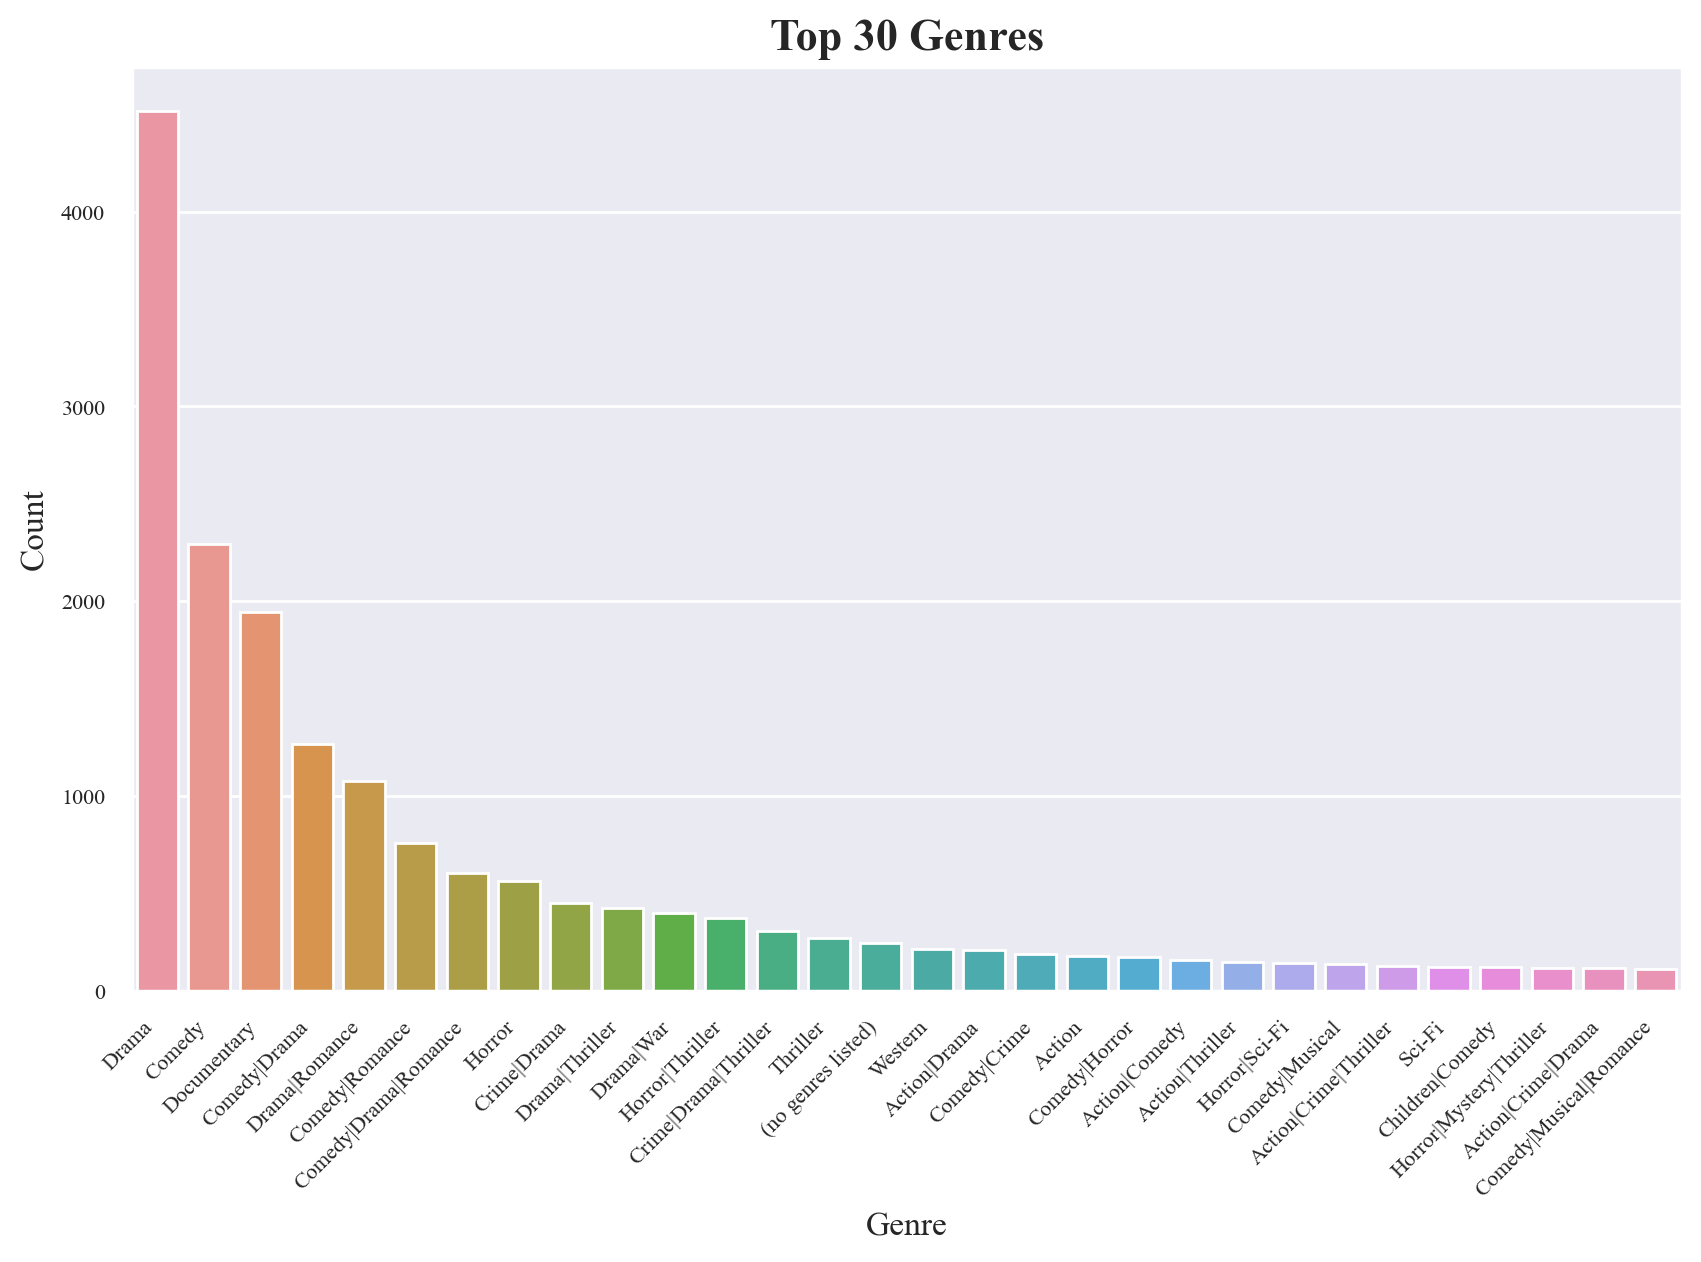

In [4]:
#top 30 genres
plt.figure(figsize=(10,6), dpi=200)
sns.set(style="darkgrid")
sns.set(font="Times New Roman")
common_genres = sns.barplot(data=genres.head(30), x='genre', y='count')
common_genres.set_xticklabels(common_genres.get_xticklabels(), rotation=45, horizontalalignment='right')
common_genres.axes.set_title("Top 30 Genres",fontsize=16, weight="bold")
common_genres.set_xlabel("Genre",fontsize=12)
common_genres.set_ylabel("Count",fontsize=12)
common_genres.tick_params(labelsize=8)

In [5]:
movie_rating = movie_df.merge(rating_df, how="inner", on="movieId")
movie_rating

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0,1999-12-11 13:36:47
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,6,5.0,1997-03-13 17:50:52
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,4.0,1996-06-05 13:37:51
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,10,4.0,1999-11-25 02:44:47
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.5,2009-01-02 01:13:41
...,...,...,...,...,...,...
20000258,131254,Kein Bund für's Leben (2007),Comedy,79570,4.0,2015-03-30 19:32:59
20000259,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,79570,4.0,2015-03-30 19:48:08
20000260,131258,The Pirates (2014),Adventure,28906,2.5,2015-03-30 19:56:32
20000261,131260,Rentun Ruusu (2001),(no genres listed),65409,3.0,2015-03-30 19:57:46


In [6]:
#Movies with 5.0 ratings
highest_rated_movies = movie_rating[["movieId", "rating"]].groupby("movieId").mean().sort_values(by="rating", ascending=False).reset_index()
highest_rated_movies = highest_rated_movies.merge(movie_df, how="inner", on="movieId")
highest_rated_movies = highest_rated_movies[highest_rated_movies["rating"]==5.0]
highest_rated_movies

,movieId,rating,title,genres
0,95517,5.0,"Barchester Chronicles, The (1982)",Drama
1,105846,5.0,Only Daughter (2013),Drama
2,89133,5.0,Boys (Drenge) (1977),Drama
3,105187,5.0,Linotype: The Film (2012),Documentary
4,105191,5.0,Rocaterrania (2009),Documentary|Fantasy
...,...,...,...,...
108,94431,5.0,"Ella Lola, a la Trilby (1898)",(no genres listed)
109,93967,5.0,"Keeping the Promise (Sign of the Beaver, The) ...",Children|Drama
110,99450,5.0,Sun Kissed (2012),Documentary
111,129905,5.0,The Floating Castle (2012),Comedy|Drama


In [7]:
#most popular genres with highest ratings
highest_rated_genres = highest_rated_movies["genres"].value_counts().to_frame().reset_index()
highest_rated_genres = highest_rated_genres.rename(columns={"index": "genre", "genres" :"count"})
highest_rated_genres

,genre,count
0,Documentary,41
1,Drama,17
2,Comedy,11
3,(no genres listed),6
4,Comedy|Drama,4
5,Comedy|Drama|Romance,3
6,Children|Drama,2
7,Animation,2
8,Romance,2
9,Crime|Documentary,1


In [19]:
import plotly.express as px

fig = px.pie(highest_rated_genres.head(10),
    values='count', names='genre', 
    title='<b>Most Popular Genres with Highest Ratings (5.0)</b>',
    width=500, height=400
    )
fig.update_traces(textposition='inside')
fig.update_layout(
    uniformtext_minsize=10, 
    uniformtext_mode='hide',
    font_family="Times New Roman")
fig.show()

In [62]:
movie_rating["timestamp"] = pd.DatetimeIndex(movie_rating["timestamp"])
movie_rating["year"] = movie_rating["timestamp"].dt.year
movie_rating

,movieId,title,genres,userId,rating,timestamp,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0,1999-12-11 13:36:47,1999
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,6,5.0,1997-03-13 17:50:52,1997
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,4.0,1996-06-05 13:37:51,1996
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,10,4.0,1999-11-25 02:44:47,1999
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.5,2009-01-02 01:13:41,2009
...,...,...,...,...,...,...,...
20000258,131254,Kein Bund für's Leben (2007),Comedy,79570,4.0,2015-03-30 19:32:59,2015
20000259,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,79570,4.0,2015-03-30 19:48:08,2015
20000260,131258,The Pirates (2014),Adventure,28906,2.5,2015-03-30 19:56:32,2015
20000261,131260,Rentun Ruusu (2001),(no genres listed),65409,3.0,2015-03-30 19:57:46,2015


In [79]:
df = movie_rating[movie_rating["rating"]==5.0]
top3movies_per_year = {}
for year in sorted(list(df["year"].unique())):
    #return the top 3 movies each year
    top3movies_per_year[year] = list(df[df["year"]==year][["title", "userId"]].groupby("title").count().reset_index().sort_values(by="userId", ascending=False).head(3)["title"].values)

top3movies_per_year

{1995: ['Seven (a.k.a. Se7en) (1995)'],
 1996: ['Shawshank Redemption, The (1994)',
  'Pulp Fiction (1994)',
  'Silence of the Lambs, The (1991)'],
 1997: ['Star Wars: Episode IV - A New Hope (1977)',
  'Fargo (1996)',
  'Star Wars: Episode VI - Return of the Jedi (1983)'],
 1998: ['Titanic (1997)',
  'Star Wars: Episode IV - A New Hope (1977)',
  "Schindler's List (1993)"],
 1999: ['Star Wars: Episode IV - A New Hope (1977)',
  'Fargo (1996)',
  'Godfather, The (1972)'],
 2000: ['American Beauty (1999)',
  'Star Wars: Episode IV - A New Hope (1977)',
  'Shawshank Redemption, The (1994)'],
 2001: ['Crouching Tiger, Hidden Dragon (Wo hu cang long) (2000)',
  'Star Wars: Episode IV - A New Hope (1977)',
  'American Beauty (1999)'],
 2002: ['Lord of the Rings: The Fellowship of the Ring, The (2001)',
  'Matrix, The (1999)',
  'Star Wars: Episode V - The Empire Strikes Back (1980)'],
 2003: ['Lord of the Rings: The Two Towers, The (2002)',
  'Lord of the Rings: The Fellowship of the Ring, 

/var/folders/cf/3kbbttcn1g35qhk6ldvlg1lh0000gn/T/ipykernel_38002/1636361400.py:3: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "--bo" (-> color='b'). The keyword argument will take precedence.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


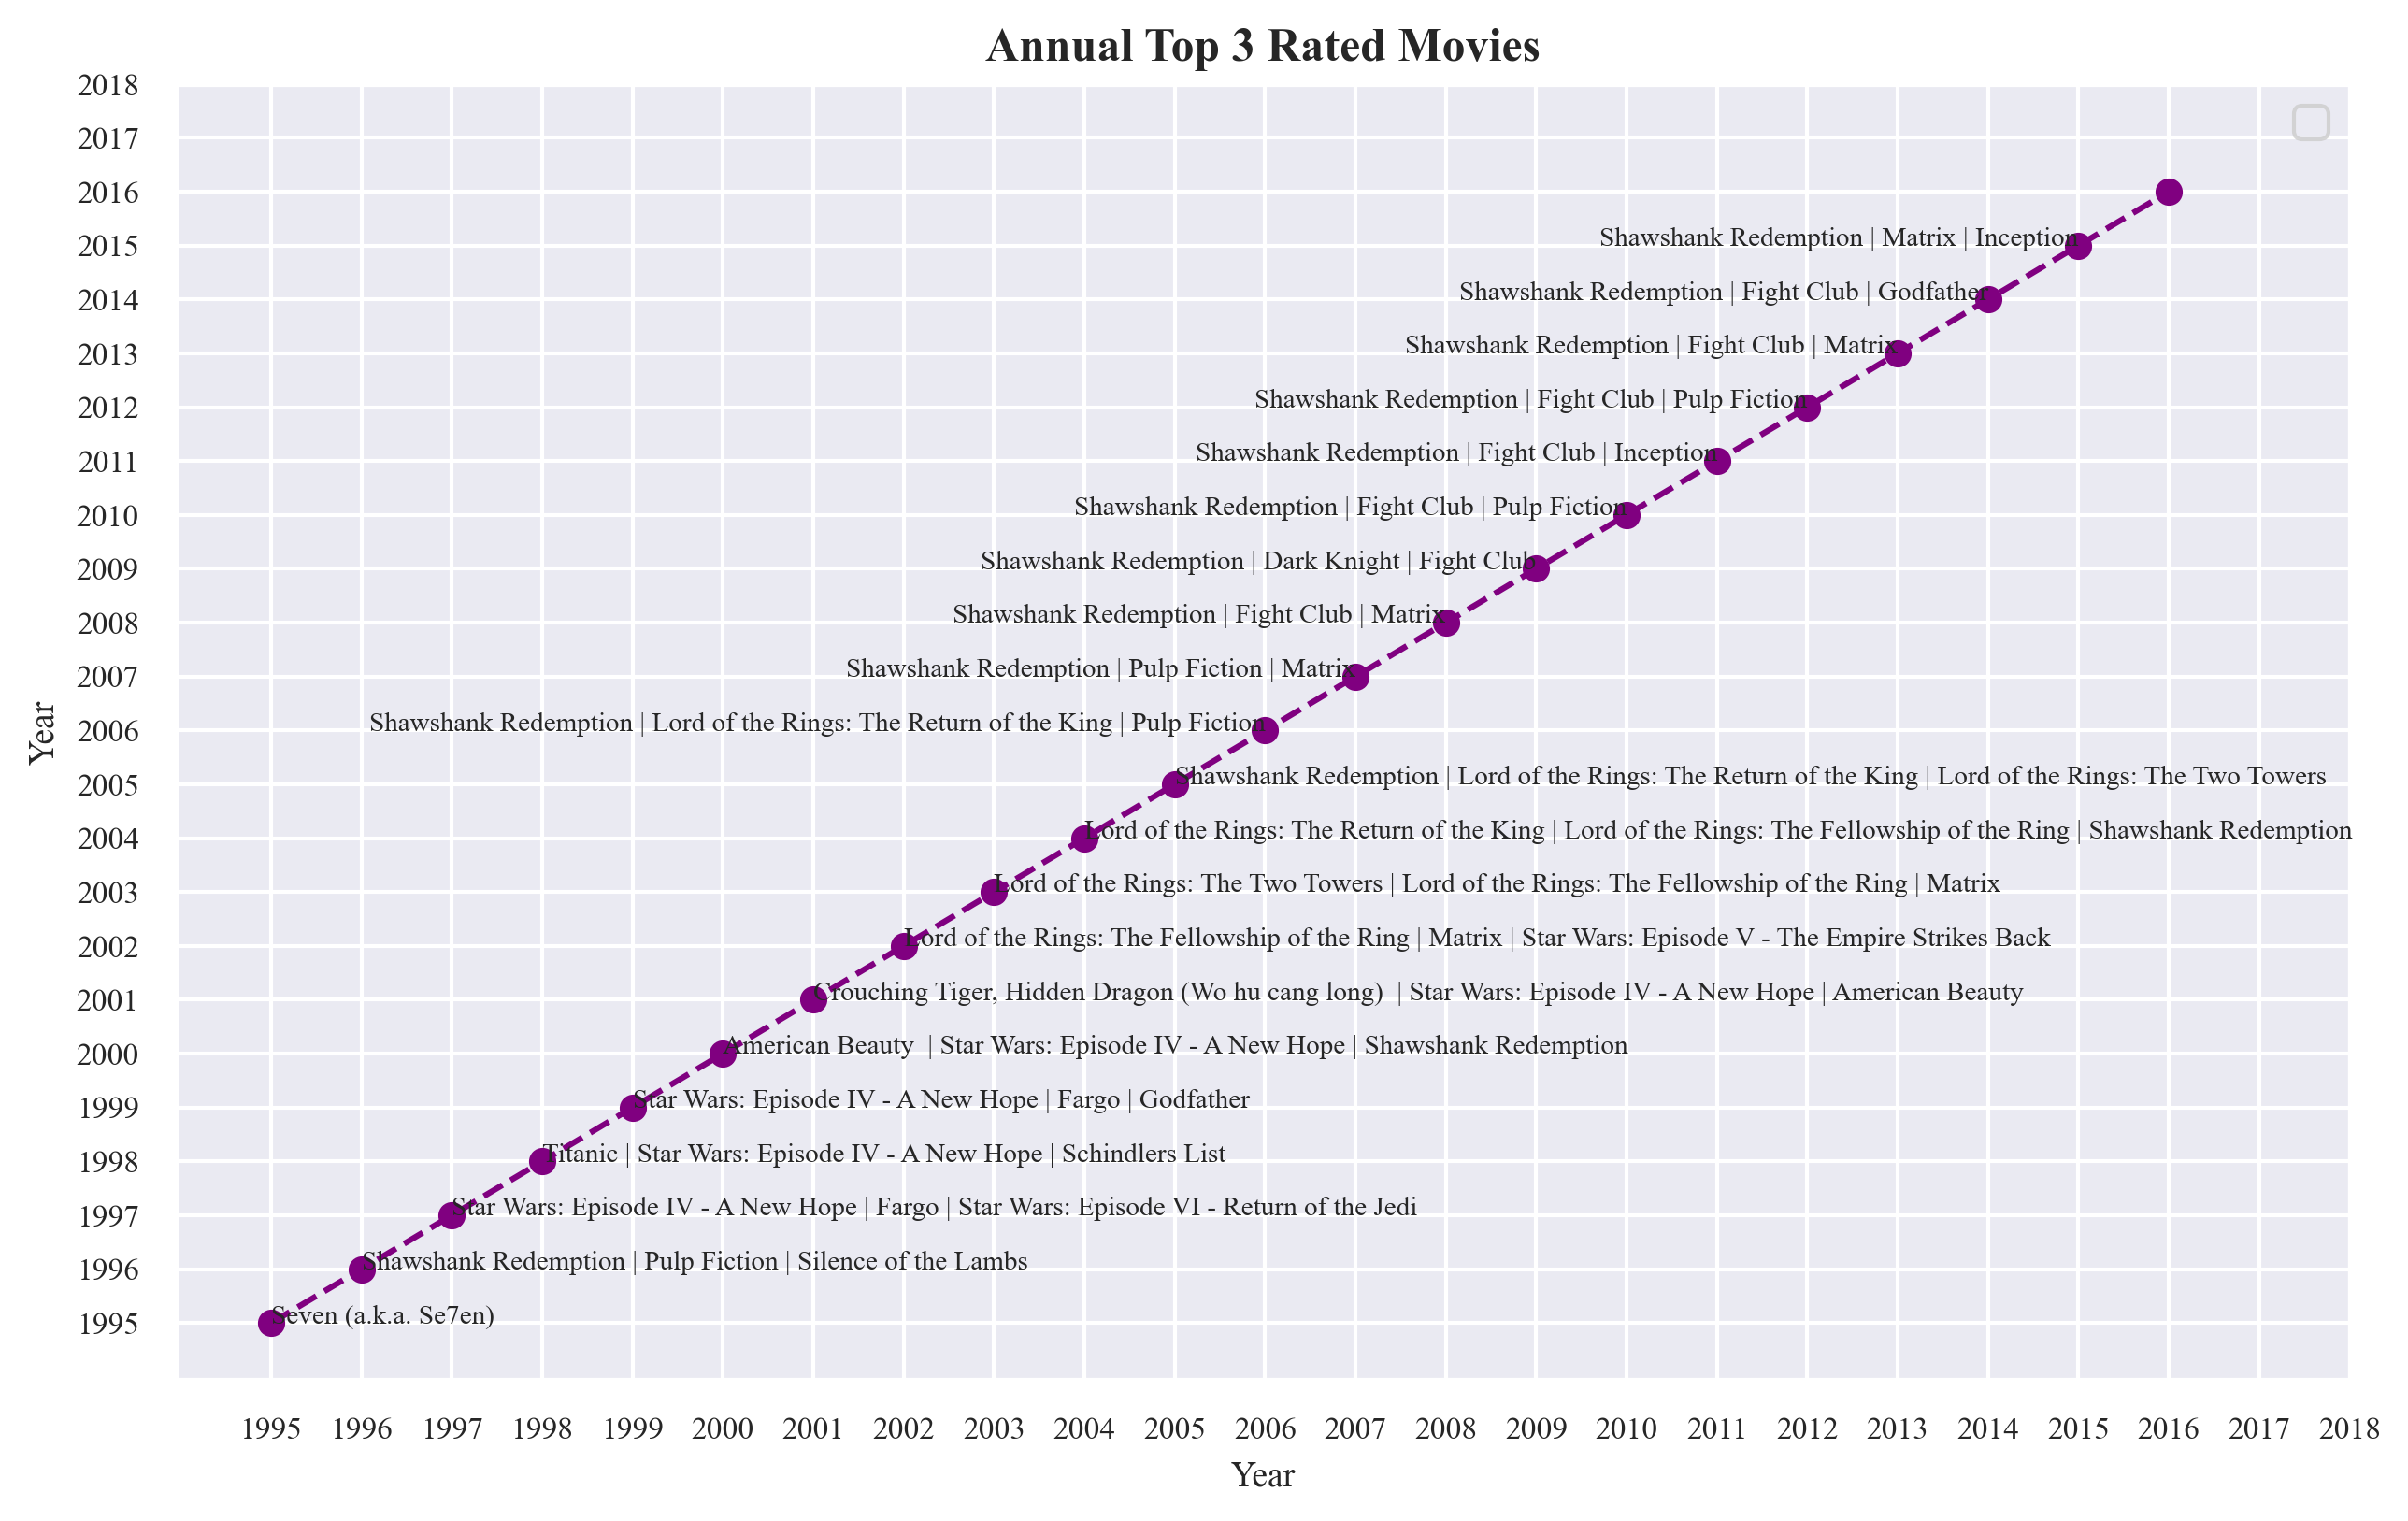

In [222]:
years = list(range(1995, 2019, 1))
plt.figure(figsize=(10,6), dpi=300)
plt.plot(years[:-2], years[:-2], "--bo", color="purple")
plt.xticks(np.arange(min(years), max(years)+1, 1), fontsize=8)
plt.yticks(np.arange(min(years), max(years)+1, 1), fontsize=8)
plt.text(1995,1995,'Seven (a.k.a. Se7en)', fontsize=7)
plt.text(1996, 1996, 'Shawshank Redemption | Pulp Fiction | Silence of the Lambs', fontsize=7)
plt.text(1997, 1997, 'Star Wars: Episode IV - A New Hope | Fargo | Star Wars: Episode VI - Return of the Jedi', fontsize=7)
plt.text(1998, 1998, 'Titanic | Star Wars: Episode IV - A New Hope | Schindlers List', fontsize=7)
plt.text(1999, 1999, 'Star Wars: Episode IV - A New Hope | Fargo | Godfather', fontsize=7)
plt.text(2000, 2000, 'American Beauty  | Star Wars: Episode IV - A New Hope | Shawshank Redemption', fontsize=7)
plt.text(2001, 2001, 'Crouching Tiger, Hidden Dragon (Wo hu cang long)  | Star Wars: Episode IV - A New Hope | American Beauty', fontsize=7)
plt.text(2002, 2002, 'Lord of the Rings: The Fellowship of the Ring | Matrix | Star Wars: Episode V - The Empire Strikes Back', fontsize=7)
plt.text(2003, 2003, 'Lord of the Rings: The Two Towers | Lord of the Rings: The Fellowship of the Ring | Matrix', fontsize=7)
plt.text(2004, 2004, 'Lord of the Rings: The Return of the King | Lord of the Rings: The Fellowship of the Ring | Shawshank Redemption', fontsize=7)
plt.text(2005, 2005, 'Shawshank Redemption | Lord of the Rings: The Return of the King | Lord of the Rings: The Two Towers', fontsize=7)
plt.text(2006, 2006, 'Shawshank Redemption | Lord of the Rings: The Return of the King | Pulp Fiction', fontsize=7, horizontalalignment='right')
plt.text(2007, 2007, 'Shawshank Redemption | Pulp Fiction | Matrix', fontsize=7, horizontalalignment='right')
plt.text(2008, 2008, 'Shawshank Redemption | Fight Club | Matrix', fontsize=7, horizontalalignment='right')
plt.text(2009, 2009, 'Shawshank Redemption | Dark Knight | Fight Club', fontsize=7, horizontalalignment='right')
plt.text(2010, 2010, 'Shawshank Redemption | Fight Club | Pulp Fiction', fontsize=7, horizontalalignment='right')
plt.text(2011, 2011, 'Shawshank Redemption | Fight Club | Inception', fontsize=7, horizontalalignment='right')
plt.text(2012, 2012, 'Shawshank Redemption | Fight Club | Pulp Fiction', fontsize=7, horizontalalignment='right')
plt.text(2013, 2013, 'Shawshank Redemption | Fight Club | Matrix', fontsize=7, horizontalalignment='right')
plt.text(2014, 2014, 'Shawshank Redemption | Fight Club | Godfather', fontsize=7, horizontalalignment='right')
plt.text(2015, 2015, 'Shawshank Redemption | Matrix | Inception', fontsize=7, horizontalalignment='right')
plt.title("Annual Top 3 Rated Movies", weight="bold")
plt.xlabel("Year", fontsize=9)
plt.ylabel("Year", fontsize=9)
plt.legend()
plt.show()

In [188]:
#most relevant tags for each movie
tags = genome_scores_df.groupby("movieId").apply(lambda x: x.sort_values(by="relevance", ascending=False).head(1))[["movieId", "tagId"]]
tags = tags.merge(genome_tags_df, how="inner", on="tagId")

#most frequent tags
tags = tags["tag"].value_counts().to_frame().reset_index()
tags = tags.rename(columns={"index": "tag", "tag": "count"})

In [213]:
fig = px.scatter(tags, x="count", y="count", size="count", color="tag", hover_name="tag", log_x=True, size_max=60,
title='<b>Most Frequent Tags</b>')

fig.update_layout(
    font_family="Times New Roman")
    
fig.show()